## Лабораторна робота 5. **CLASSIFICATION** 🔵/🔺

Оцінювання даної роботи буде ураховувати якість Ваших висновків та візуалізацій. При наявності ЛИШЕ коду та візуалізацій без роз'яснень, робота оцінюватися НЕ БУДЕ.  

Більшість поставлених в цій лабораторній роботі задач в майбутньому буде ставитись Вами самойстійно!

Під час виконання Вам дозволено користуватися будь-якими зручними для вас бібліотеками для візуалізації. 

Оформлення коментарів повинно проводитися в текстових комірках ноутбука з використанням синтаксису [LaTeX](https://en.wikibooks.org/wiki/LaTeX/Basics) для оформлення тексту та формул. 

Роботи ідентифіковані як ІДЕНТИЧНІ одразу отримують 0 балів.

# Опис вибірки "bank-additional-full"

   # Input variables:
   `bank client data:`  
   1 - **age** (numeric)  
   2 - **job** : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")  
   3 - **marital** : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)  
   4 - **education** (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")  
   5 - **default**: has credit in default? (categorical: "no","yes","unknown")  
   6 - **housing**: has housing loan? (categorical: "no","yes","unknown")  
   7 - **loan**: has personal loan? (categorical: "no","yes","unknown")  
   # related with the last contact of the current campaign:  
   8 - **contact**: contact communication type (categorical: "cellular","telephone")   
   9 - **month**: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")  
  10 - **day_of_week**: last contact day of the week (categorical: "mon","tue","wed","thu","fri")  
  11 - **duration**: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.  
   # other attributes:  
  12 - **campaign**: number of contacts performed during this campaign and for this client (numeric, includes last contact)  
  13 - **pdays**: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)  
  14 - **previous**: number of contacts performed before this campaign and for this client (numeric) 
  15 - **poutcome**: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")  
   # social and economic context attributes  
  16 - **emp.var.rate**: employment variation rate - quarterly indicator (numeric)  
  17 - **cons.price.idx**: consumer price index - monthly indicator (numeric)       
  18 - **cons.conf.idx**: consumer confidence index - monthly indicator (numeric)       
  19 - **euribor3m**: euribor 3 month rate - daily indicator (numeric)  
  20 - **nr.employed**: number of employees - quarterly indicator (numeric)  
    
   `Output variable (desired target):`  
  21 - **y** - has the client subscribed a term deposit? (binary: "yes","no")

## Імпорт необхідних бібліотек та завантаження даних

**Завдання 1** підготовка даних до опрацювання

1. завантажте вибірку `bank-additional-full.csv`;   
2. підключіть необхідні бібліотеки;  
3. вивести основну статистичну інформацію по числовим змінним;  
4. вивести розмірність датасету.

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#code

df = pd.read_csv("D:/Vlad/Все ДЗ(2)/2/AI/Rep-AI/bank-additional-full.csv", delimiter=';')

statistics = df.describe()

dataset_shape = df.shape
statistics, dataset_shape

(               age      duration      campaign         pdays      previous  \
 count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
 mean      40.02406    258.285010      2.567593    962.475454      0.172963   
 std       10.42125    259.279249      2.770014    186.910907      0.494901   
 min       17.00000      0.000000      1.000000      0.000000      0.000000   
 25%       32.00000    102.000000      1.000000    999.000000      0.000000   
 50%       38.00000    180.000000      2.000000    999.000000      0.000000   
 75%       47.00000    319.000000      3.000000    999.000000      0.000000   
 max       98.00000   4918.000000     56.000000    999.000000      7.000000   
 
        emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
 count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
 mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
 std        1.570960        0.578840     

**Завдання 2** підготовка цільової змінної  

1. проаналізувати атрибути вибірки, визначити цільовий атрибут `target atribute`;
2. якщо `target atribute` є категоріальним, його необхідно перетворити в чисельний.

In [12]:
bank_target = df['y']

print(bank_target.head())


0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: y, dtype: float64


## Аналіз змінних, які характеризують клієнтів банку:

**Завдання 3** Визначитись зі всіма атрибутами, що характреризують кліентів банку:
- виділити їх в окрему частину;
- первірити всі змінні (які унікальні значення містять атрибути)(дивись опис датасету).

In [16]:
bank_client = df[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact']]

for column in bank_client.columns:
    print(f"Унікальні значення '{column}' - {bank_client[column].unique()}\n")

Унікальні значення 'age' - [56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]

Унікальні значення 'job' - ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']

Унікальні значення 'marital' - ['married' 'single' 'divorced' 'unknown']

Унікальні значення 'education' - ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']

Унікальні значення 'default' - ['no' 'unknown' 'yes']

Унікальні значення 'housing' - ['no' 'yes' 'unknown']

Унікальні значення 'loan' - ['no' 'yes' 'unknown']

Унікальні значення 'contact' - ['telephone' 'cellular']



**Завдання 4** Аналіз атрибуту `Age`:  
1. Вивести максимальне та мінімальне значення;  
2. Перевірити на наявність `NaN`;  
3. Провести візуальний аналіз зміної `Age`:
    - побудувати `countplot`, `boxplot`, `distplot`;
    - перевірити розподіл по змінній `Age` на важкі хвости.

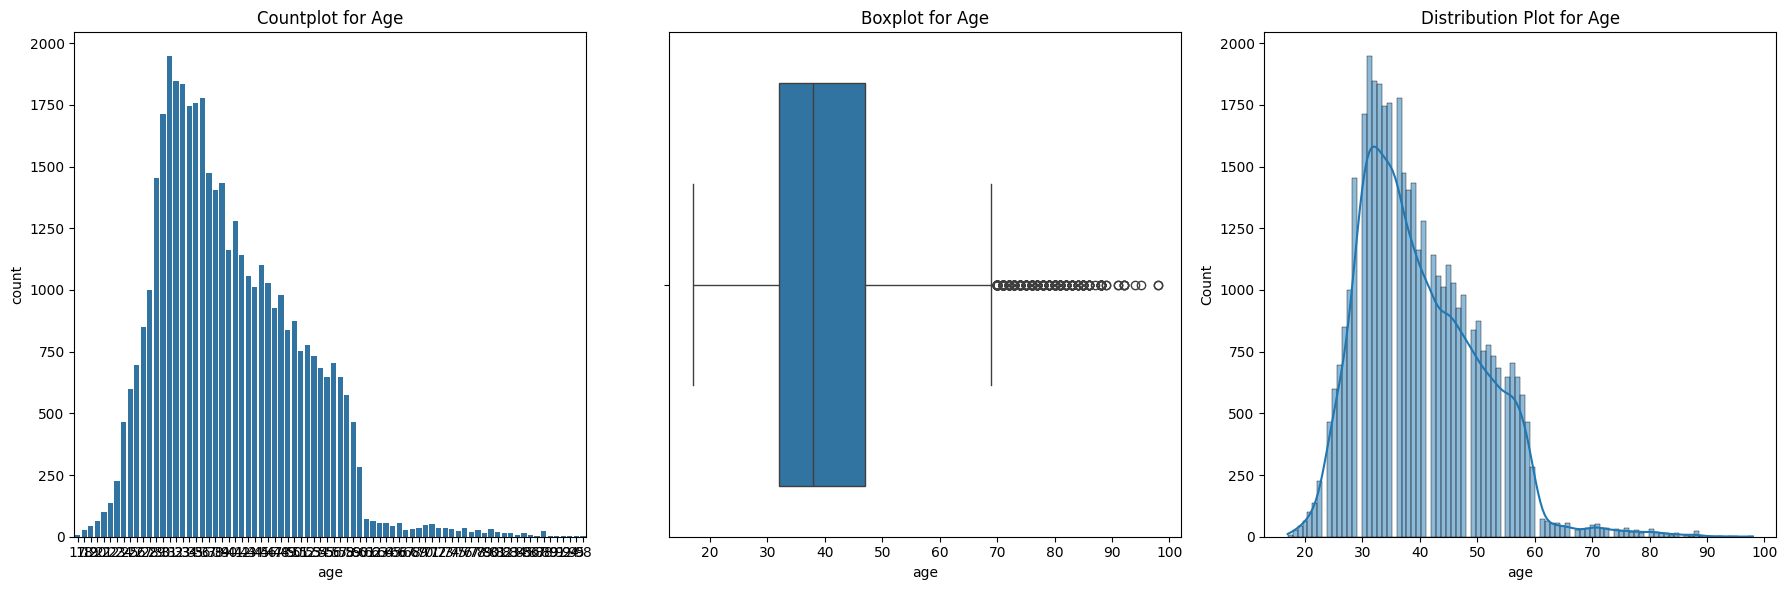

(17, 98, 0)

In [ ]:
age_max = df['age'].max()
age_min = df['age'].min()

age_nan_count = df['age'].isna().sum()

plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.countplot(x='age', data=df)
plt.title('Countplot for Age')

plt.subplot(1, 3, 2)
sns.boxplot(x='age', data=df)
plt.title('Boxplot for Age')

plt.subplot(1, 3, 3)
sns.histplot(df['age'], kde=True)
plt.title('Distribution Plot for Age')

plt.tight_layout()
plt.show()

(age_min, age_max, age_nan_count)

**Висновки з 1-4 завдання (детальні)**

1.   
2.   
3. ...

**Завдання 5** Перевірити атрибут `Age` на викиди: 

In [ ]:
import numpy as np
import pandas as pd
from IPython.display import display

def detect_outliers_with_interquantile_range(df: pd.DataFrame,
                                             column: str,
                                             low_percentile: int,
                                             high_percentile: int) -> pd.DataFrame:
    """
    Detecting outliers using interquantile range set manually

    Parameters:
    df: pd.DataFrame to detect outliers
    column: target column (e.g., 'age')
    low_percentile: lower bound percentile (e.g., 25 for Q1)
    high_percentile: upper bound percentile (e.g., 75 for Q3)

    Returns:
    pd.DataFrame with detected outliers
    """
    sorted_data = np.sort(df[column])
    
    Q1 = np.percentile(sorted_data, low_percentile)
    Q3 = np.percentile(sorted_data, high_percentile)
    print('')
    print(f"Q1 {low_percentile} percentile of the given data: {Q1}")
    print('')
    print(f"Q3 {high_percentile} percentile of the given data: {Q3}")
    print('')
    print('----------------------------------------------------------')

    IQR = Q3 - Q1
    print('')
    print(f"Interquantile range: {IQR}")
    print('')
    print('----------------------------------------------------------')

    low_lim = Q1 - 1.5 * IQR
    up_lim = Q3 + 1.5 * IQR
    print('')
    print(f" Lower bound: {low_lim}")
    print('')
    print(f" Upper bound: {up_lim}")
    print('')
    print('----------------------------------------------------------')

    outliers = df[(df[column] > up_lim) | (df[column] < low_lim)]
    print('')
    print(f"Outliers in the dataset:")
    display(outliers)
    print('')

    return outliers

In [25]:
outliers = detect_outliers_with_interquantile_range(bank_client, 'age', 10, 90)


Q1 10 percentile of the given data: 28.0

Q3 90 percentile of the given data: 55.0

----------------------------------------------------------

Interquantile range: 27.0

----------------------------------------------------------

 Lower bound: -12.5

 Upper bound: 95.5

----------------------------------------------------------

Outliers in the dataset:


,age,job,marital,education,default,housing,loan,contact
38452,98,retired,married,basic.4y,unknown,yes,no,cellular
38455,98,retired,married,basic.4y,unknown,yes,no,cellular


**Висновки з завдання 5 (детальні)**

1.   
2.   
3. ...

**Завдання 6** Аналіз атрибутів `job`, `marital` та `education`:  
- Побудувати графіки розподілу даних по цим змінним.

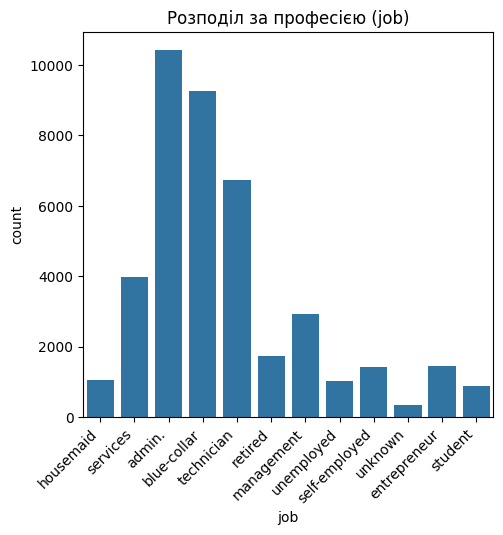

In [31]:
#code

plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.countplot(x='job', data=df)
plt.title('Розподіл за професією (job)')
plt.xticks(rotation=45, ha='right')

plt.show()

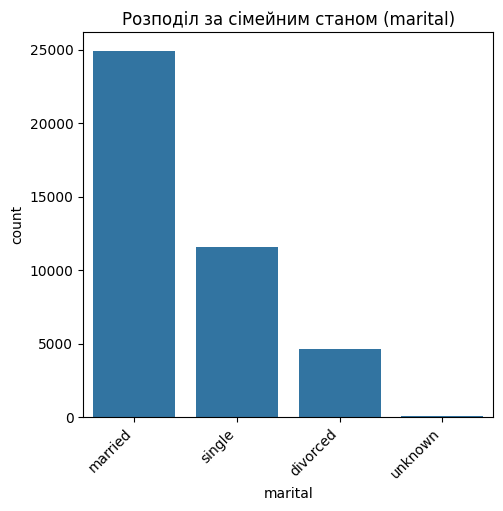

In [30]:
#code

plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 2)
sns.countplot(x='marital', data=df)
plt.title('Розподіл за сімейним станом (marital)')
plt.xticks(rotation=45, ha='right')

plt.show()

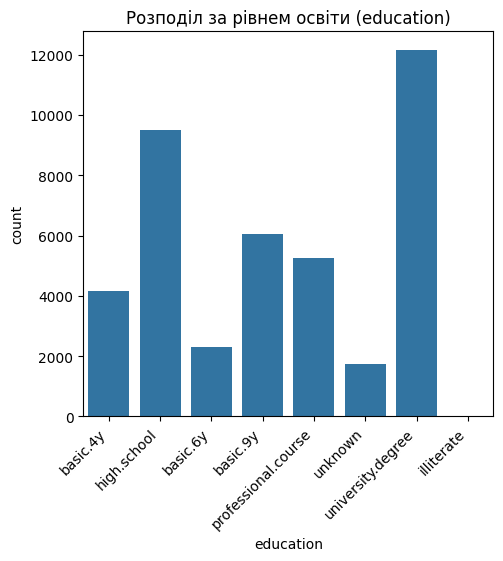

In [29]:
#code

plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 3)
sns.countplot(x='education', data=df)
plt.title('Розподіл за рівнем освіти (education)')
plt.xticks(rotation=45, ha='right')

plt.show()

**Висновки з завдання 6 (детальні)**

1.   
2.   
3. ...

**Завдання 7** Аналіз атрибутів `default`, `housing` та `loan`:  
- Побудувати графіки розподілу даних по цим змінним.

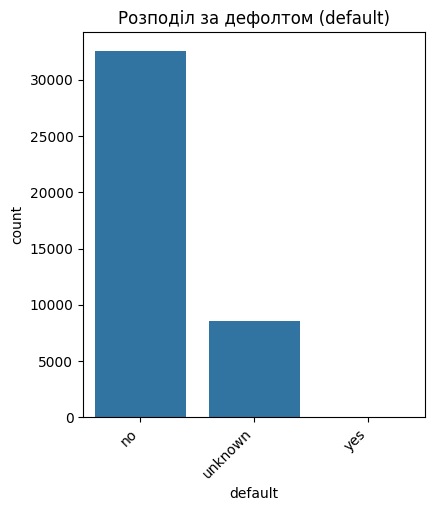

In [32]:
#code

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.countplot(x='default', data=df)
plt.title('Розподіл за дефолтом (default)')
plt.xticks(rotation=45, ha='right')

plt.show()

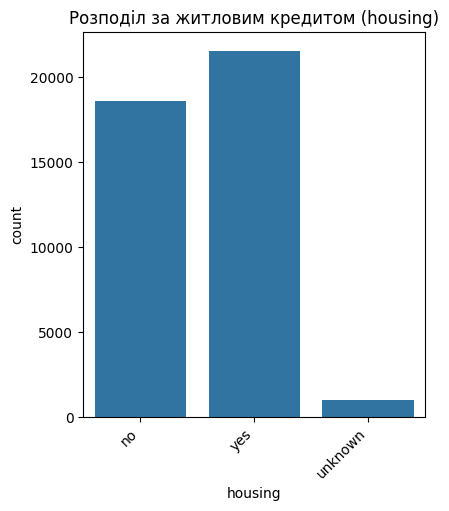

In [33]:
#code

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 2)
sns.countplot(x='housing', data=df)
plt.title('Розподіл за житловим кредитом (housing)')
plt.xticks(rotation=45, ha='right')

plt.show()

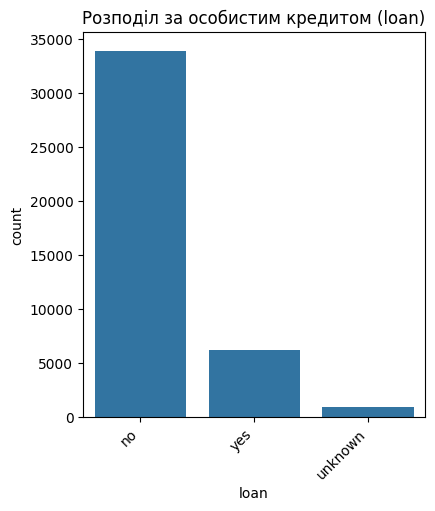

In [34]:
#code

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 3)
sns.countplot(x='loan', data=df)
plt.title('Розподіл за особистим кредитом (loan)')
plt.xticks(rotation=45, ha='right')

plt.show()

**Завдання 8** Змінні **Jobs, Marital, Education, Default, Housing, Loan** трансформувати в неперервні змінні:

In [ ]:
def encode_categorical_columns(df: pd.DataFrame, categorical_cols: list) -> pd.DataFrame:
    """
    Function for encoding categorical features using LabelEncoder
    
    df: pd.DataFrame to encode
    categorical_cols: specified columns to encode
    
    returns: pd.DataFrame with encoded values
    """
    for col in categorical_cols:
        le = LabelEncoder()
        not_null = df[col][df[col].notnull()]
        df[col] = pd.Series(le.fit_transform(not_null), index=not_null.index)
      
    return df

In [39]:
bank_client = encode_categorical_columns(bank_client, ['job', 'marital', 'education', 'default', 'housing',  'loan'])

print(bank_client[['job', 'marital', 'education', 'default', 'housing', 'loan']].head())

   job  marital  education  default  housing  loan
0    3        1          0        0        0     0
1    7        1          3        1        0     0
2    7        1          3        0        2     0
3    0        1          1        0        0     0
4    7        1          3        0        0     2


**Завдання 9** Трансфомувати змінну **Age** (використовуючи її квартильні значення):




In [ ]:
def encode_age(dataframe: pd.DataFrame, age_col: str) -> pd.DataFrame:
    """
    Function for encoding age column using quartile-based discretization
    
    Parameters:
    dataframe: pd.DataFrame to encode
    age_col: age column to encode
    
    Returns:
    pd.DataFrame with encoded age column
    """
    Q1 = dataframe[age_col].quantile(0.25)
    Q2 = dataframe[age_col].quantile(0.50)
    Q3 = dataframe[age_col].quantile(0.75)
    
    bins = [dataframe[age_col].min(), Q1, Q2, Q3, dataframe[age_col].max()]
    
    bins = np.unique(bins)

    num_bins = len(bins) - 1
    labels = list(range(num_bins))
    
    dataframe[age_col] = pd.cut(dataframe[age_col], bins=bins, labels=labels, include_lowest=True)
    
    dataframe[age_col] = dataframe[age_col].astype(int)
    
    return dataframe

bank_client = encode_age(bank_client, 'age')

**Висновки з завдання 9 (детальні)** перевірити як відбулося перетворення змінних

## Вибірка містить певну кількість атрибутів, які характеризують останій зв'язок кліентів з банком

**Завдання 10** Виділити в окремий датафрейм змінні, які характеризують зв'язок клієнтів з банком;
- вивести цей датафрейм;
- перевірити ці змінні на `NaN`.

In [ ]:
bank_relat = bank_client[['default', 'housing', 'loan']]

print("DataFrame bank_relat:")
display(bank_relat)

print("\nПеревірка на NaN значення в bank_relat:")
nan_counts = bank_relat.isna().sum()
print(nan_counts)

DataFrame bank_relat:


,default,housing,loan
0,0,0,0
1,1,0,0
2,0,2,0
3,0,0,0
4,0,0,2
...,...,...,...
41183,0,2,0
41184,0,0,0
41185,0,2,0
41186,0,0,0



Перевірка на NaN значення в bank_relat:
default    0
housing    0
loan       0
dtype: int64


**Завдання 11** вивести унікальні значення, які містять атрибути `contact`, `month`, `day_of_week`

In [64]:
#code

unique_contact = df['contact'].unique()
unique_month = df['month'].unique()
unique_day_of_week = df['day_of_week'].unique()

print(unique_contact)
print(unique_month)
print(unique_day_of_week)

['telephone' 'cellular']
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
['mon' 'tue' 'wed' 'thu' 'fri']


# Провести аналіз змінної **Duration**

змінна ` duration` містить інформацію про тривалість останнього дзвінка, в секундах (числова). Важливе зауваження: цей атрибут сильно впливає на цільову змінну (наприклад, якщо тривалість = 0, тоді y = "ні"). Проте тривалість невідома до здійснення дзвінка. Крім того, після закінчення дзвінка y, очевидно, відомо. Таким чином, цей внесок слід включати лише для цілей порівняльних показників і відкидати, якщо метою є реалістична модель прогнозування.

**Завдання 12** Аналіз атрибуту `duration`:  

Провести візуальний аналіз зміної `duration`:  


*   побудувати  `boxplot` та `distplot`; 
*   перевірити розподіл по змінній `duration` на важкі хвости. 



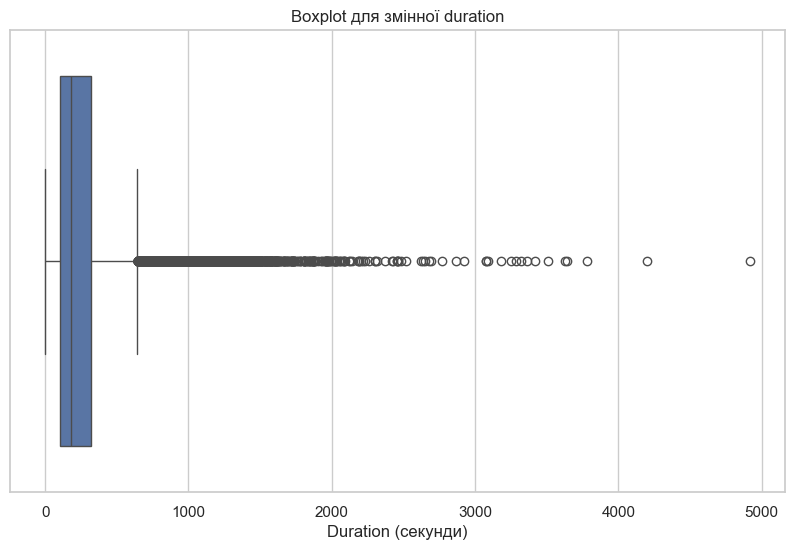

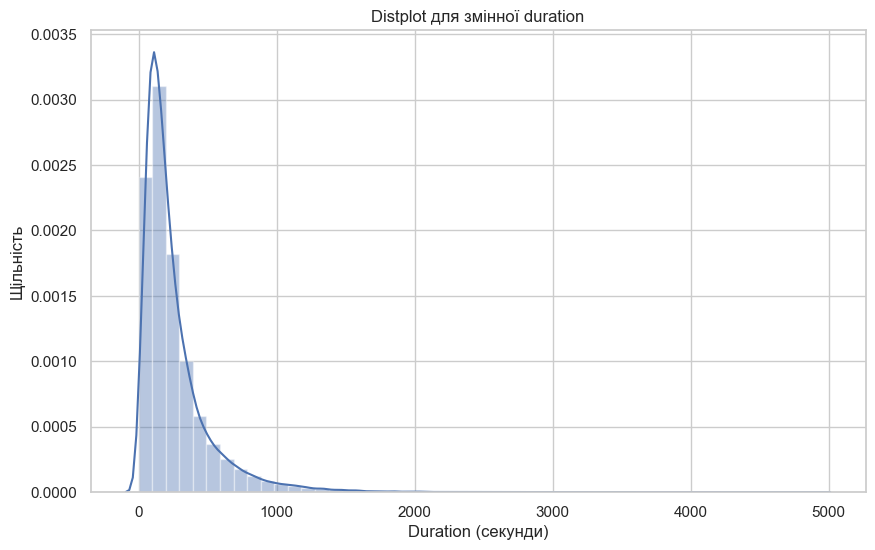

Міжквартильний розмах (IQR): 217.0
Нижня межа для викидів: -223.5
Верхня межа для викидів: 644.5

Кількість викидів у duration: 2963

Перші кілька викидів у duration:
    duration
37      1666
57       787
61       812
75      1575
83      1042


In [ ]:
#code

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['duration'])
plt.title('Boxplot для змінної duration')
plt.xlabel('Duration (секунди)')
plt.show()

plt.figure(figsize=(10, 6))
sns.distplot(df['duration'], kde=True, hist=True, bins=50)
plt.title('Distplot для змінної duration')
plt.xlabel('Duration (секунди)')
plt.ylabel('Щільність')
plt.show()

Q1 = df['duration'].quantile(0.25)
Q3 = df['duration'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Міжквартильний розмах (IQR):", IQR)
print("Нижня межа для викидів:", lower_bound)
print("Верхня межа для викидів:", upper_bound)

outliers = df[(df['duration'] < lower_bound) | (df['duration'] > upper_bound)]
print("\nКількість викидів у duration:", len(outliers))
print("\nПерші кілька викидів у duration:")
print(outliers[['duration']].head())

**Завдання 13** Закодувати змінні Contact, Month, Day of Week (використовуйте функцію `encode_categorical_columns()`)

In [79]:
#code

def encode_categorical_columns(dataframe: pd.DataFrame, columns: list) -> pd.DataFrame:
    """
    Функція для кодування категоріальних змінних у числові значення.
    
    Parameters:
    dataframe: pd.DataFrame - DataFrame для кодування
    columns: list - список стовпців для кодування
    
    Returns:
    pd.DataFrame - DataFrame із закодованими стовпцями
    """
    df = dataframe.copy()
    for col in columns:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
    return df

columns_to_encode = ['contact', 'month', 'day_of_week']

df = encode_categorical_columns(df, columns_to_encode)

print(df[columns_to_encode].head())

   contact  month  day_of_week
0        1      6            1
1        1      6            1
2        1      6            1
3        1      6            1
4        1      6            1


**Завдання 14** Трансфомувати змінну **duration**, використовуючи її квартильні значення:

In [78]:
def encode_duration(dataframe: pd.DataFrame, duration_col: str) -> pd.DataFrame:
    """
    Function for encoding duration column using quartile-based discretization
    
    Parameters:
    dataframe: pd.DataFrame to encode
    duration_col: duration column to encode
    
    Returns:
    pd.DataFrame with encoded duration column
    """
    Q1 = dataframe[duration_col].quantile(0.25)
    Q2 = dataframe[duration_col].quantile(0.50)
    Q3 = dataframe[duration_col].quantile(0.75)
    
    bins = [dataframe[duration_col].min(), Q1, Q2, Q3, dataframe[duration_col].max()]
    
    bins = sorted(list(set(bins)))
    
    num_bins = len(bins) - 1
    labels = list(range(num_bins))
    
    dataframe[duration_col] = pd.cut(dataframe[duration_col], bins=bins, labels=labels, include_lowest=True)
    
    dataframe[duration_col] = dataframe[duration_col].astype(int)
    
    return dataframe

df = encode_duration(df, 'duration')

print(df['duration'].head())
print(df['duration'].value_counts().sort_index())

0    1
1    0
2    1
3    0
4    1
Name: duration, dtype: int32
duration
0    20705
1    10197
2    10286
Name: count, dtype: int64


## Провести аналіз атрибутів **соціального та економічного контексту**

**Завдання 15** Виділити в окремий датафрейм атрибути соціального та єкономічного контексту

In [77]:
bank_socec = df[['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']]

print(bank_socec.head())

   emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed
0           1.1          93.994          -36.4      4.857       5191.0
1           1.1          93.994          -36.4      4.857       5191.0
2           1.1          93.994          -36.4      4.857       5191.0
3           1.1          93.994          -36.4      4.857       5191.0
4           1.1          93.994          -36.4      4.857       5191.0


**Завдання 16** Виділити в окремий датафрейм всі інші атрибути атрибути - `campaign`, `pdays`,`previous`, `poutcome`

In [71]:
bank_other = df[['campaign', 'pdays', 'previous', 'poutcome']]

print("DataFrame bank_other:")
print(bank_other.head())

DataFrame bank_other:
   campaign  pdays  previous     poutcome
0         1    999         0  nonexistent
1         1    999         0  nonexistent
2         1    999         0  nonexistent
3         1    999         0  nonexistent
4         1    999         0  nonexistent


**Завдання 17** Провести трансформацію атрибуту `poutcome`

In [76]:
#code

le = LabelEncoder()
bank_other['poutcome'] = le.fit_transform(bank_other['poutcome'])

print(bank_other.head())
print(bank_other['poutcome'].unique())

   campaign  pdays  previous  poutcome
0         1    999         0         1
1         1    999         0         1
2         1    999         0         1
3         1    999         0         1
4         1    999         0         1
[1 0 2]


## Будування моделей класифікації

**Завдання 18** З'єднати всі отримані блоки в один датафрейм і перевірити, що він містить тільки потрібні для моделювання колонки

In [80]:
bank_final = pd.concat([bank_client, bank_other, bank_socec], axis=1)

columns_to_add = ['contact', 'month', 'day_of_week', 'duration']
bank_final = pd.concat([bank_final, df[columns_to_add]], axis=1)

bank_final['y'] = df['y']
le = LabelEncoder()
bank_final['y'] = le.fit_transform(bank_final['y'])

print(bank_final.columns)

print(bank_final.head())

print(bank_final.dtypes)

print(bank_final.isna().sum())

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'contact', 'month', 'day_of_week', 'duration', 'y'],
      dtype='object')
   age  job  marital  education  default  housing  loan    contact  campaign  \
0    1    3        1          0        0        0     0  telephone         1   
1    1    7        1          3        1        0     0  telephone         1   
2    0    7        1          3        0        2     0  telephone         1   
3    0    0        1          1        0        0     0  telephone         1   
4    1    7        1          3        0        0     2  telephone         1   

   pdays  ...  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
0    999  ...           1.1          93.994          -36.4      4.857   
1    999  ...           1.1          93.994          -36.4      4.8

**Завдання 19** Провести ділення вибірки

In [4]:
def prepare_data_for_training(X: pd.DataFrame,
                              target: pd.Series,
                              test_size: float,
                              n_splits: int,
                              random_state: int):
    """
    Function that prepares data for training. Splits the data into train and test datasets and get k-folds for cross-validation

    X: pd.DataFrame with features
    target: target pd.Series
    test_size: the size of test datasets
    n_splits: number of cross-validation splits
    random_state: random state to reproduce the same split

    returns: X_train, X_test, y_train, y_test, k_fold
    """

    X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=test_size, random_state=random_state, shuffle=True)
    k_fold = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)

    return X_train, X_test, y_train, y_test, k_fold

In [ ]:
X_train, X_test, y_train, y_test, k_fold = prepare_data_for_training(bank_final, bank_target, 0.2, 10, 101)

In [6]:
def scale_the_data(X_train: pd.DataFrame,
                   X_test: pd.DataFrame):

  sc_X = StandardScaler()
  X_train = sc_X.fit_transform(X_train)
  X_test = sc_X.transform(X_test)

  return X_train, X_test

In [ ]:
X_train, X_test = scale_the_data(X_train, X_test)

## Логістична Регресія

In [ ]:
logmodel = LogisticRegression() 
logmodel.fit(X_train, y_train)
logpred = logmodel.predict(X_test)


print(confusion_matrix(y_test, logpred))
print(round(accuracy_score(y_test, logpred),2)*100)
LOGCV = (cross_val_score(logmodel, X_test, y_test, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

## k-NN

In [ ]:
neighbors = np.arange(0, 25)

cv_scores = []

for k in neighbors:
    if k == 0:
        cv_scores.append(0)
        continue
    k_value = KNeighborsClassifier(n_neighbors=k, weights='uniform', p=2, metric='euclidean')
    scores = cross_val_score(k_value, X_train, y_train, cv=k_fold, scoring='accuracy')
    cv_scores.append(scores.mean())

optimal_k = neighbors[np.argmax(cv_scores)]

plt.plot(neighbors, cv_scores, marker='o')
plt.title(f'The optimal number of neighbors is {optimal_k} with {max(cv_scores):.3f} (optimal_k, cv_scores[optimal_k])')
plt.xlabel('Number of neighbors K')
plt.ylabel('Train Accuracy')
plt.grid(True)
plt.show()

print(f"Оптимальне значення k: {optimal_k}")
print(f"Середня точність при оптимальному k: {cv_scores[optimal_k]:.3f}")

In [ ]:
knn = KNeighborsClassifier(n_neighbors=optimal_k, weights='uniform', p=2, metric='euclidean')
knn.fit(X_train, y_train)
knnpred = knn.predict(X_test)

print(confusion_matrix(y_test, knnpred))
print(round(accuracy_score(y_test, knnpred),2)*100)
KNNCV = (cross_val_score(knn, X_test, y_test, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

## Логістична Регресія

In [13]:
models = pd.DataFrame({
                'Models': ['Logistic Regression'],
                'Score': [90]
})
models = models.sort_values(by='Score', ascending=False)
print(models)

                Models  Score
0  Logistic Regression     90


**Висновки по моделям (детальні)**

1.   
2.   
3. ...